# Dictionary Initialization

In [1]:
prescientDict = {}
daily_log_likelihoods = {}
daily_regrets = {}

# collections for plotting charts about the performance of the RW predictor
rwValues = []
rwMeanRegretValues = []
rwMeanlogLikelihoodValues = []
prescientAlreadyPrinted = False

# Import Data

First date of training dataset:  2010-01-04 00:00:00
Last date of training dataset:  2019-02-08 00:00:00
len of training dataset:  2291

First date of validation dataset:  2019-02-11 00:00:00
Last date of validation dataset:  2021-09-14 00:00:00
len of validation dataset:  654

First date of test dataset:  2021-09-15 00:00:00
Last date of test dataset:  2022-12-30 00:00:00
len of test dataset:  327

total dataset lenght:  3272
sum of the three datasets:  3272
original returns dataframe dimension: (3272, 3)


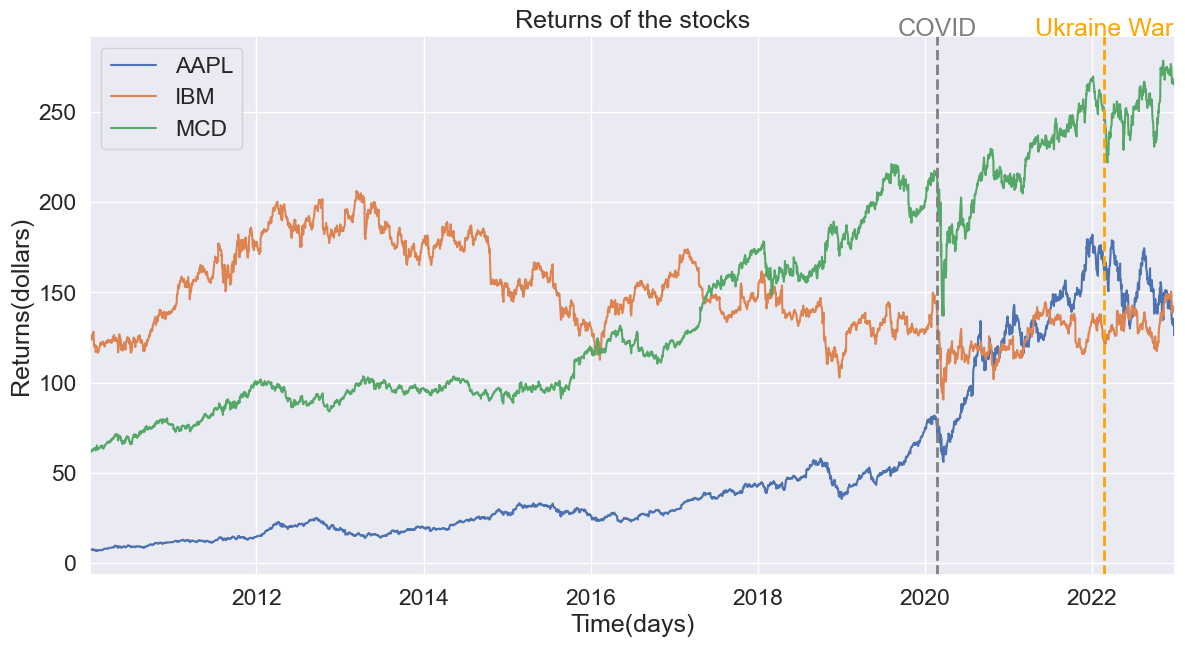

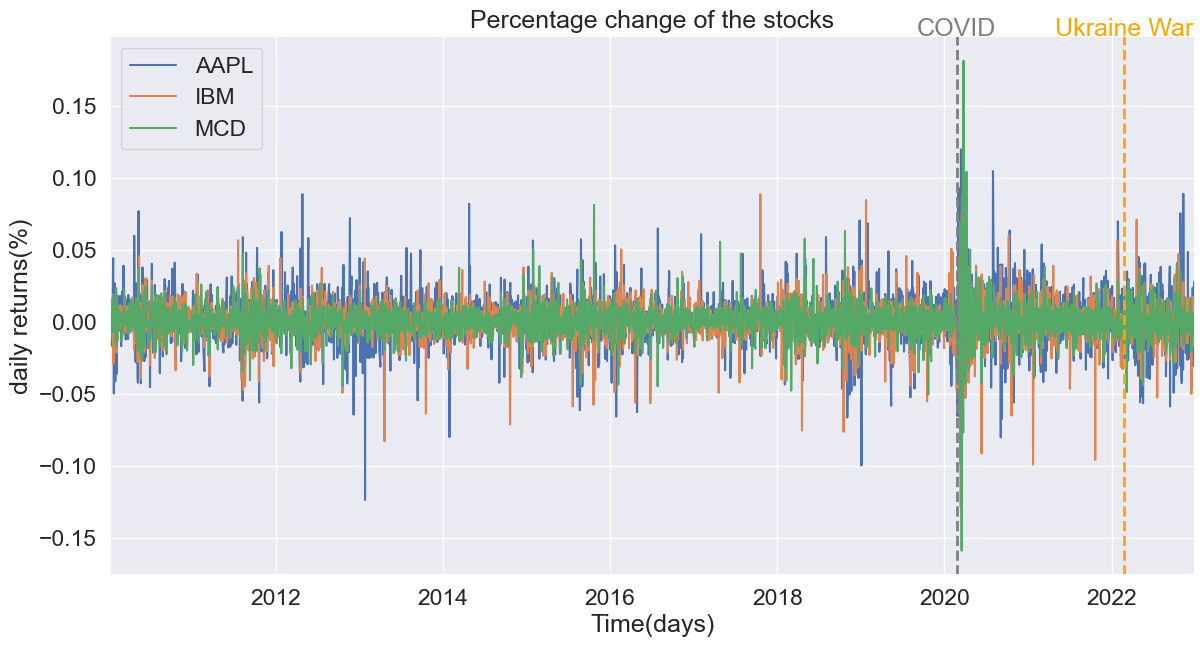

2010-01-04 00:00:00           7         20990     21177
7      0.000301  0.000114  0.000060
20990  0.000114  0.000102  0.000041
21177  0.000060  0.000041  0.000071
2010-01-05 00:00:00           7         20990     21177
7      0.000301  0.000114  0.000060
20990  0.000114  0.000102  0.000041
21177  0.000060  0.000041  0.000071
2010-01-06 00:00:00           7         20990     21177
7      0.000301  0.000114  0.000060
20990  0.000114  0.000102  0.000041
21177  0.000060  0.000041  0.000071
2010-01-07 00:00:00           7         20990     21177
7      0.000301  0.000114  0.000060
20990  0.000114  0.000102  0.000041
21177  0.000060  0.000041  0.000071
2010-01-08 00:00:00           7         20990     21177
7      0.000301  0.000114  0.000060
20990  0.000114  0.000102  0.000041
21177  0.000060  0.000041  0.000071
dimension of the prescient dictionary: 3272
2010-01-04 00:00:00
          7         20990     21177
7      0.000301  0.000114  0.000060
20990  0.000114  0.000102  0.000041
21177  0

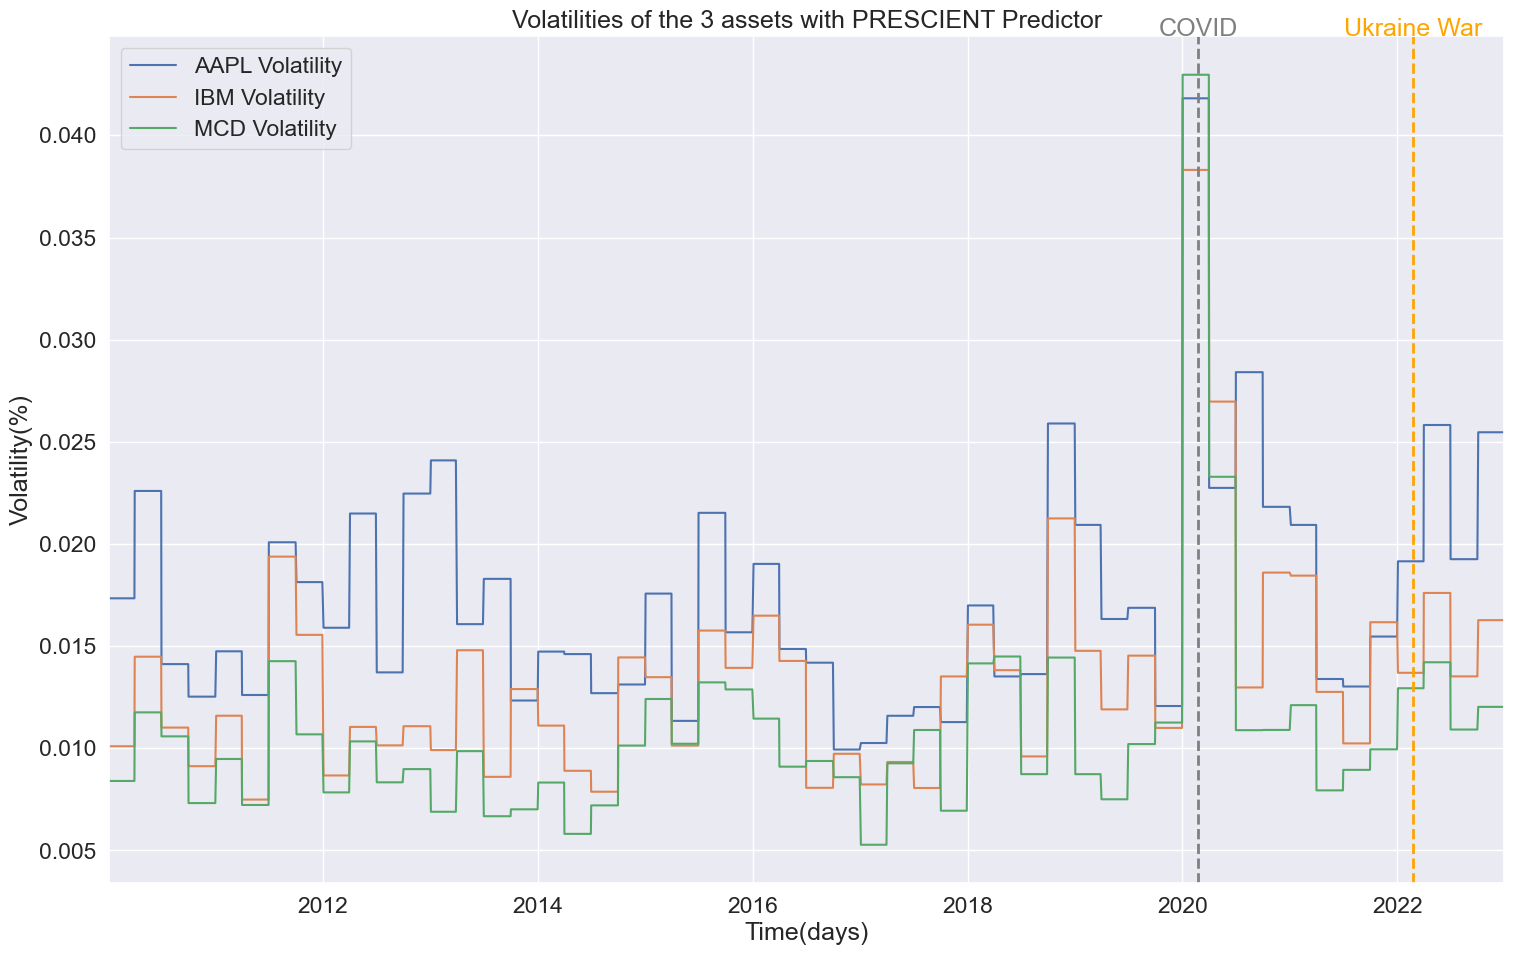

In [2]:
from predictorStarter import * # this file contains the import of every dataset, libraries needed and the initial plotting of the data
from predictorsImplementation import * # this file contains the implementation of the predictors ( one function implementation for each predictor)

# Covariance Predictors

FOR THE RW PREDICTOR THERE IS NO TRAINING PHASE, THE PREDICTOR HAS M(window memory) AS UNIQUE PARAMETER AND IT IS AN HYPERPARAMETER. 
The best value for M has been found with the grid search method applied in the validation phase.

# Validation Phase for RW predictor

In [3]:
# this function is used to plot the performance of the RW predictor in terms of regret and log-likelihood

def plotLogLikelihoodPerformanceRW(rwValues, rwMeanlogLikelihoodValues, prescientMeanlogLikelihoodValue):
    '''
    plot the chart of the mean log-likelihood value
    '''
    rwMinValuesLogLikelihood = [] # this list will contain the rw values that have the max log-likelihood value
    plt.figure()
    plt.plot(rwValues, rwMeanlogLikelihoodValues)
    plt.title("Mean log-likelihood values of the RW predictor")
    plt.xlabel("RW memory")
    plt.ylabel("Mean log-likelihood")
    plt.title("Mean log-likelihood values of the RW predictor")

    # show also the loglikelihood value of the prescient predictor
    plt.axhline(y=prescientMeanlogLikelihoodValue, color='r', linestyle='-')
    plt.legend(["RW", "PRESCIENT"])

    # find the rw values that have the max log-likelihood value
    for j in range(len(rwMeanlogLikelihoodValues)):
        if rwMeanlogLikelihoodValues[j] == max(rwMeanlogLikelihoodValues):
            rwMinValuesLogLikelihood.append(rwValues[j])

    # these points show the interval of rw values that have the maximum log-likelihood value
    highlightsPoint1 = rwMinValuesLogLikelihood[0]
    plt.scatter(highlightsPoint1, max(rwMeanlogLikelihoodValues), color='r')
    #plt.text(highlightsPoint1, max(rwMeanlogLikelihoodValues), f' M: {highlightsPoint1:.1f}\n Log-likelihood: {max(rwMeanlogLikelihoodValues):.4f}', fontsize=9, color='red', ha='center', va='bottom')

    highlightsPoint2 = rwMinValuesLogLikelihood[-1]
    plt.scatter(highlightsPoint2, max(rwMeanlogLikelihoodValues), color='r')
    #plt.text(highlightsPoint2, max(rwMeanlogLikelihoodValues), f' M: {highlightsPoint2:.1f}\n Log-likelihood: {max(rwMeanlogLikelihoodValues):.4f}', fontsize=9, color='red', ha='center', va='bottom')
    
    # find the y value coordinate corresponding to the highlightPoint1LogLikelihood and highlightPoint2LogLikelihood
    highlightsPoint1Index = rwValues.index(highlightsPoint1)
    highlightsPoint2Index = rwValues.index(highlightsPoint2)

    highlightsPoint1Y = rwMeanlogLikelihoodValues[highlightsPoint1Index]
    highlightsPoint2Y = rwMeanlogLikelihoodValues[highlightsPoint2Index]

    print(f"rwMemory: {highlightsPoint1:.4f}\n Log-likelihood: {highlightsPoint1Y:.4f}")
    print(f"rwMemory: {highlightsPoint2:.4f}\n Log-likelihood: {highlightsPoint2Y:.4f}")

    # set the x-axis limits
    plt.xlim(left=10, right=600)

    plt.show()


def plotRegretPerformanceRW(rwValues, rwMeanRegretValues):
    '''
    plot the chart of the mean regret values
    '''

    rwMinValuesRegret = [] # this list will contain the rw values that have the min regret value
    plt.plot(rwValues, rwMeanRegretValues)
    plt.title("Mean regret values of the RW predictor")
    plt.xlabel("RW memory")
    plt.ylabel("Mean regret")
    plt.title("Mean regret values of the RW predictor")

    # find the rw values that have the min regret value
    for i in range(len(rwMeanRegretValues)):
        if rwMeanRegretValues[i] == min(rwMeanRegretValues):
            rwMinValuesRegret.append(rwValues[i])

    # these points show the interval of rw values that have the minimum regret value
    highlightsPoint1 = rwMinValuesRegret[0]
    plt.scatter(highlightsPoint1, min(rwMeanRegretValues), color='r')
    #plt.text(highlightsPoint1, min(rwMeanRegretValues), f' rwMemory: {highlightsPoint1:.1f} \n Regret: {min(rwMeanRegretValues):.4f}', fontsize=9, color='red', ha='center', va='bottom')

    highlightsPoint2 = rwMinValuesRegret[-1]
    plt.scatter(highlightsPoint2, min(rwMeanRegretValues), color='r')
    #plt.text(highlightsPoint2, min(rwMeanRegretValues), f' rwMemory: {highlightsPoint2:.1f} \n Regret: {min(rwMeanRegretValues):.4f}', fontsize=9, color='red', ha='center', va='bottom')
    
    # find the y value coordinate corresponding to the highlightPoint1Regret and highlightPoint2Regret
    highlightsPoint1Index = rwValues.index(highlightsPoint1)
    highlightsPoint2Index = rwValues.index(highlightsPoint2)

    highlightsPoint1Y = rwMeanRegretValues[highlightsPoint1Index]
    highlightsPoint2Y = rwMeanRegretValues[highlightsPoint2Index]

    print(f"rwMemory: {highlightsPoint1:.4f}\n Regret: {highlightsPoint1Y:.4f}")
    print(f"rwMemory: {highlightsPoint2:.4f}\n Regret: {highlightsPoint2Y:.4f}")

    # set the x-axis limits
    plt.xlim(left=10, right=600)

    plt.show()

In [4]:
def plotPerformanceRW(rwValues, rwMeanlogLikelihoodValues, prescientMeanlogLikelihoodValue, rwMeanRegretValues):
    '''
    plotting the results of the RW predictor expressed in terms of loglikelihood and regret on a single chart
    '''

    fig, ax1 = plt.subplots(figsize=(10, 6))

    # Plot the mean log-likelihood values for RW
    color = 'tab:blue'
    ax1.set_xlabel('RW values')
    ax1.set_ylabel('Mean log-likelihood', color=color)
    ax1.plot(rwValues, rwMeanlogLikelihoodValues, color=color, label='Loglikelihood RW')
    ax1.tick_params(axis='y', labelcolor=color)

    # Plot the loglikelihood value of the prescient predictor
    ax1.axhline(y=prescientMeanlogLikelihoodValue, color='tab:green', linestyle='-', label='Loglikelihood PRESCIENT')

    # Highlight the maximum log-likelihood points
    max_log_likelihood = max(rwMeanlogLikelihoodValues)
    max_points = [beta for beta, value in zip(rwValues, rwMeanlogLikelihoodValues) if value == max_log_likelihood]

    # take just the first and last element of the list
    max_points = [max_points[0], max_points[-1]]

    # scatter the points by writing the memory value and the loglikelihood value on the chart
    for point in max_points:
        ax1.scatter(point, max_log_likelihood, color='green')
        plt.text(point, max_log_likelihood, f' x: {point:.0f}\n y: {max_log_likelihood:.1f}', fontsize=9, color='green', ha='center', va='bottom')

    # Add a second y-axis for the regret values
    ax2 = ax1.twinx()  
    color = 'tab:red'
    ax2.set_ylabel('Mean regret', color=color)  
    ax2.plot(rwValues, rwMeanRegretValues, color=color, label='Regret RW')
    ax2.tick_params(axis='y', labelcolor=color)

    # Highlight the minimum regret points
    min_regret = min(rwMeanRegretValues)
    min_points = [beta for beta, value in zip(rwValues, rwMeanRegretValues) if value == min_regret]

    # take just the first and last element of the list
    min_points = [min_points[0], min_points[-1]]

    # scatter the points by writing the beta value and the regret value on the chart
    for point in min_points:
        ax2.scatter(point, min_regret, color='red')
        plt.text(point, min_regret, f' x: {point:.0f}\n y: {min_regret:.1f}', fontsize=9, color='red', ha='center', va='bottom')

    print("max_points: " + str(max_points))
    print("min_points: " + str(min_points))

    # Create the legend, which combines both axes
    lines, labels = ax1.get_legend_handles_labels()
    lines2, labels2 = ax2.get_legend_handles_labels()
    ax2.legend(lines + lines2, labels + labels2, loc='upper right')

    # Add title
    plt.title("Performance of RW for different M values")

    # Set the x-axis limits
    ax1.set_xlim(left=rwValues[0], right=rwValues[-1])

    fig.tight_layout()  # to ensure the right y-label is not slightly clipped
    plt.show()


In [5]:
# Loop through rw_memory values

def rwValidationPhase(rw_memory, startingDate, endingDate, rw_size_increment, prescientAlreadyPrinted):
    '''
    this function is used to perform the validation phase of the RW predictor; it's used to find the best memory size of the window for the rw predictor.
    Grid search is used and the performance of the M hyperparameter is evaluated using the MSE, log-likelihood and regret metrics.
    '''

    while rw_memory < 700:

        rwDict = rolling_window(validationDataWithPercentageChange, rw_memory) 

        #
        # DEFINE END AND START DATES FOR BACKTESTS
        #
            
        start_date = pd.to_datetime(startingDate, format="%Y-%m-%d")
        end_date = pd.to_datetime(endingDate, format="%Y-%m-%d")

        names = ["RW", "PRESCIENT"]

        #these predictors are all dictionaries where each entry contains a Pandas DataFrame representing a covariance matrix of returns at each timestamp.  
        predictors_temp = [rwDict, prescientDict]
        predictors = [] # so this is a list of dictionaries

        for predictor in predictors_temp:
            predictors.append({t: predictor[t] for t in predictor.keys() if t >= start_date and t <= end_date})
            

        #
        # LOG-LIKELIHOODS
        #

        '''
            this dictionary has a shape like this:
            {
                RW: pd.Series(log_likelihood(returns_temp, Sigmas_temp), index=times),
                EWMA: pd.Series(log_likelihood(returns_temp, Sigmas_temp), index=times),
                MGARCH: pd.Series(log_likelihood(returns_temp, Sigmas_temp), index=times),
                PRESCIENT: pd.Series(log_likelihood(returns_temp, Sigmas_temp), index=times),
            }

            where each pd.series is a series of log-likelihoods for each timestamp: so there is the log-likelihood value for each timestamp
        '''

        for i, predictorDict in enumerate(predictors):

            # if the predictor is the prescient predictor, i have to use the uniformly distributed dataset
            if names[i] == "PRESCIENT":
                returns_temp = uniformlyDistributedReturns.loc[pd.Series(predictorDict).index].values[1:]
            
            else:
                returns_temp = validationDataWithPercentageChange.loc[pd.Series(predictorDict).index].values[1:]

            times = pd.Series(predictorDict).index[1:]
            Sigmas_temp = np.stack([predictorDict[t].values for t in predictorDict.keys()])[:-1]       
            daily_log_likelihoods[names[i]] = pd.Series(log_likelihood(returns_temp, Sigmas_temp), index=times)

        #
        # REGRETS
        #

        for name in daily_log_likelihoods:
            daily_regrets[name] =  daily_log_likelihoods["PRESCIENT"] - daily_log_likelihoods[name]


        # plot the log-likelihood values of the prescient predictor
        if prescientAlreadyPrinted == False:    
            plt.figure(figsize=(14, 7))
            plt.plot(daily_log_likelihoods['PRESCIENT'].index, daily_log_likelihoods['PRESCIENT'].values, label='Prescient Daily Log-Likelihood', marker='x', linestyle='-', color='green')
            plt.title(f'Daily Log-Likelihood of the Prescient Predictor')
            plt.xlabel('Date(days)')
            plt.ylabel('Value')
            plt.legend()
            plt.show()
            prescientAlreadyPrinted = True

            
        for name in daily_regrets:
            if name != "PRESCIENT":

                #Each data point in the regret series now represents the average regret for a respective quarter. If the original series spans multiple years, then the number of data points in regret will be the number of quarters in that time frame.
                quarterly_regrets = daily_regrets[name].resample("Q").mean() #it resamples the regret Series to a quarterly frequency, This gives the average regret for each quarter rather than daily regret values  
                # so the regret variable is a series of average regret for each quarter
                
                regretMetrics = (np.mean(quarterly_regrets).round(1), np.std(quarterly_regrets).round(1), np.max(quarterly_regrets).round(1))
                # the round(1) function to each of these metrics, which rounds the result to one decimal place,

                # save the regret mean values to plot a chart
                rwMeanRegretValues.append(regretMetrics[0])

        # copy the log-likelihoods dictionary
        daily_log_likelihoods_copy = daily_log_likelihoods.copy()
        prescientMeanlogLikelihoodValues = []

        # do the same thing for log-likelihoods dictionary
        for name in daily_log_likelihoods_copy:
            quarterly_logLikelihood = daily_log_likelihoods_copy[name].resample("Q").mean()
            logLikelihoodMetrics = (np.mean(quarterly_logLikelihood).round(1), np.std(quarterly_logLikelihood).round(1), np.max(quarterly_logLikelihood).round(1))

            if name != "PRESCIENT":
                # save the log-likelihood mean values to plot a chart
                rwMeanlogLikelihoodValues.append(logLikelihoodMetrics[0])
            
            if name == "PRESCIENT":
            # i'm writing the prescient predictor only once, because it's the same for every rw_memory value

                # save the loglikelihood mean value to plot a chart
                prescientMeanlogLikelihoodValues.append(logLikelihoodMetrics[0])
        
        # save the rw value to plot a chart
        rwValues.append(rw_memory)

        # Increment beta
        rw_memory += rw_size_increment

    # return the fundamental values to plot the charts
    return rwValues, rwMeanRegretValues, rwMeanlogLikelihoodValues, prescientMeanlogLikelihoodValues

In [6]:
# first of all define the starting and ending date for the validation phase: take the first and the last date of the validation dataset

startingValidationDate = validationDataWithPercentageChange.index[0].strftime("%Y-%m-%d")
endingValidationDate = validationDataWithPercentageChange.index[-1].strftime("%Y-%m-%d")

In [7]:
# to go faster i skip the validation part(the correct memoru value parameter has been already found)
'''
# grid search run for the RW predictor
rwValues, rwMeanRegretValues, rwMeanlogLikelihoodValues, prescientMeanlogLikelihoodValue = rwValidationPhase(10, startingValidationDate, endingValidationDate, 10, prescientAlreadyPrinted)

# plot the performance of the RW predictor in terms of log-likelihood
plotLogLikelihoodPerformanceRW(rwValues, rwMeanlogLikelihoodValues, prescientMeanlogLikelihoodValue)

# plot the performance of the RW predictor in terms of regret
plotRegretPerformanceRW(rwValues, rwMeanRegretValues)

# plot the performance of the RW predictor in terms of log-likelihood and regret
plotPerformanceRW(rwValues, rwMeanlogLikelihoodValues, prescientMeanlogLikelihoodValue, rwMeanRegretValues)

'''

'\n# grid search run for the RW predictor\nrwValues, rwMeanRegretValues, rwMeanlogLikelihoodValues, prescientMeanlogLikelihoodValue = rwValidationPhase(10, startingValidationDate, endingValidationDate, 10, prescientAlreadyPrinted)\n\n# plot the performance of the RW predictor in terms of log-likelihood\nplotLogLikelihoodPerformanceRW(rwValues, rwMeanlogLikelihoodValues, prescientMeanlogLikelihoodValue)\n\n# plot the performance of the RW predictor in terms of regret\nplotRegretPerformanceRW(rwValues, rwMeanRegretValues)\n\n# plot the performance of the RW predictor in terms of log-likelihood and regret\nplotPerformanceRW(rwValues, rwMeanlogLikelihoodValues, prescientMeanlogLikelihoodValue, rwMeanRegretValues)\n\n'

In [9]:
'''
# example with wrong memory value parameter

startingValidationDate = validationDataWithPercentageChange.index[0].strftime("%Y-%m-%d")
endingValidationDate = validationDataWithPercentageChange.index[-1].strftime("%Y-%m-%d")

# select the best memory size for the RW predictor(the one found in the validation phase)

rw_memory = 500

rwDict = rolling_window(validationDataWithPercentageChange, rw_memory)
    
# now filter the rw volatilities between the start and end date
real_volatility_startDate = pd.to_datetime(startingValidationDate)
real_volatility_endDate = pd.to_datetime(endingValidationDate)

rw_volatilities, df_rw_volatility_aapl, df_rw_volatility_ibm, df_rw_volatility_mcd, rw_volatility_dict_aapl, rw_volatility_dict_ibm, rw_volatility_dict_mcd = plot_volatility(rwDict, real_volatility_startDate, real_volatility_endDate, 'RW')
'''

'\n# example with wrong memory value parameter\n\nstartingValidationDate = validationDataWithPercentageChange.index[0].strftime("%Y-%m-%d")\nendingValidationDate = validationDataWithPercentageChange.index[-1].strftime("%Y-%m-%d")\n\n# select the best memory size for the RW predictor(the one found in the validation phase)\n\nrw_memory = 500\n\nrwDict = rolling_window(validationDataWithPercentageChange, rw_memory)\n\n# now rw_volatilities is a dictionary that contains the real volatilities of the 3 assets for every day with the same key of the rwDict dictionary(the timestamp)\n    \n# now filter the rw volatilities between the start and end date\nreal_volatility_startDate = pd.to_datetime(startingValidationDate)\nreal_volatility_endDate = pd.to_datetime(endingValidationDate)\n\nrw_volatilities, df_rw_volatility_aapl, df_rw_volatility_ibm, df_rw_volatility_mcd, rw_volatility_dict_aapl, rw_volatility_dict_ibm, rw_volatility_dict_mcd = plot_volatility(rwDict, real_volatility_startDate, real

In [10]:
'''
# HERE THERE IS THE VOLATILITY ANALYSIS OF THE RW PREDICTOR COMPARED TO THE REAL VOLATILITY
startDateFilter = validationDataWithPrices.index[0]
endDateFilter = validationDataWithPrices.index[-1]

plot_prices_volatilities_for_rw(validationDataWithPrices, df_volatility_aapl['AAPL Volatility'],startDateFilter, endDateFilter, df_rw_volatility_aapl['AAPL Volatility'], 'AAPL')
'''

"\n# HERE THERE IS THE VOLATILITY ANALYSIS OF THE RW PREDICTOR COMPARED TO THE REAL VOLATILITY\nstartDateFilter = validationDataWithPrices.index[0]\nendDateFilter = validationDataWithPrices.index[-1]\n\nplot_prices_volatilities_for_rw(validationDataWithPrices, df_volatility_aapl['AAPL Volatility'],startDateFilter, endDateFilter, df_rw_volatility_aapl['AAPL Volatility'], 'AAPL')\n"

# Test Phase for RW predictor

In this test phase i will use the best value for rw_memory found in the validation phase to see the performance of the model on the test set and i will plot some charts to compare the volatility predicted by the model with the ground truth.

to be more fair in the measure of the model performance i will remove the first 19 days from every predictor dict minus the rolling window predictor dict.

rw_memory: 50
the timestamp of the first element of the rolling window dictionary: 2021-10-12 00:00:00
the first element of the rolling window dictionary:           7         20990     21177
7      0.000148  0.000045  0.000067
20990  0.000045  0.000119  0.000036
21177  0.000067  0.000036  0.000066


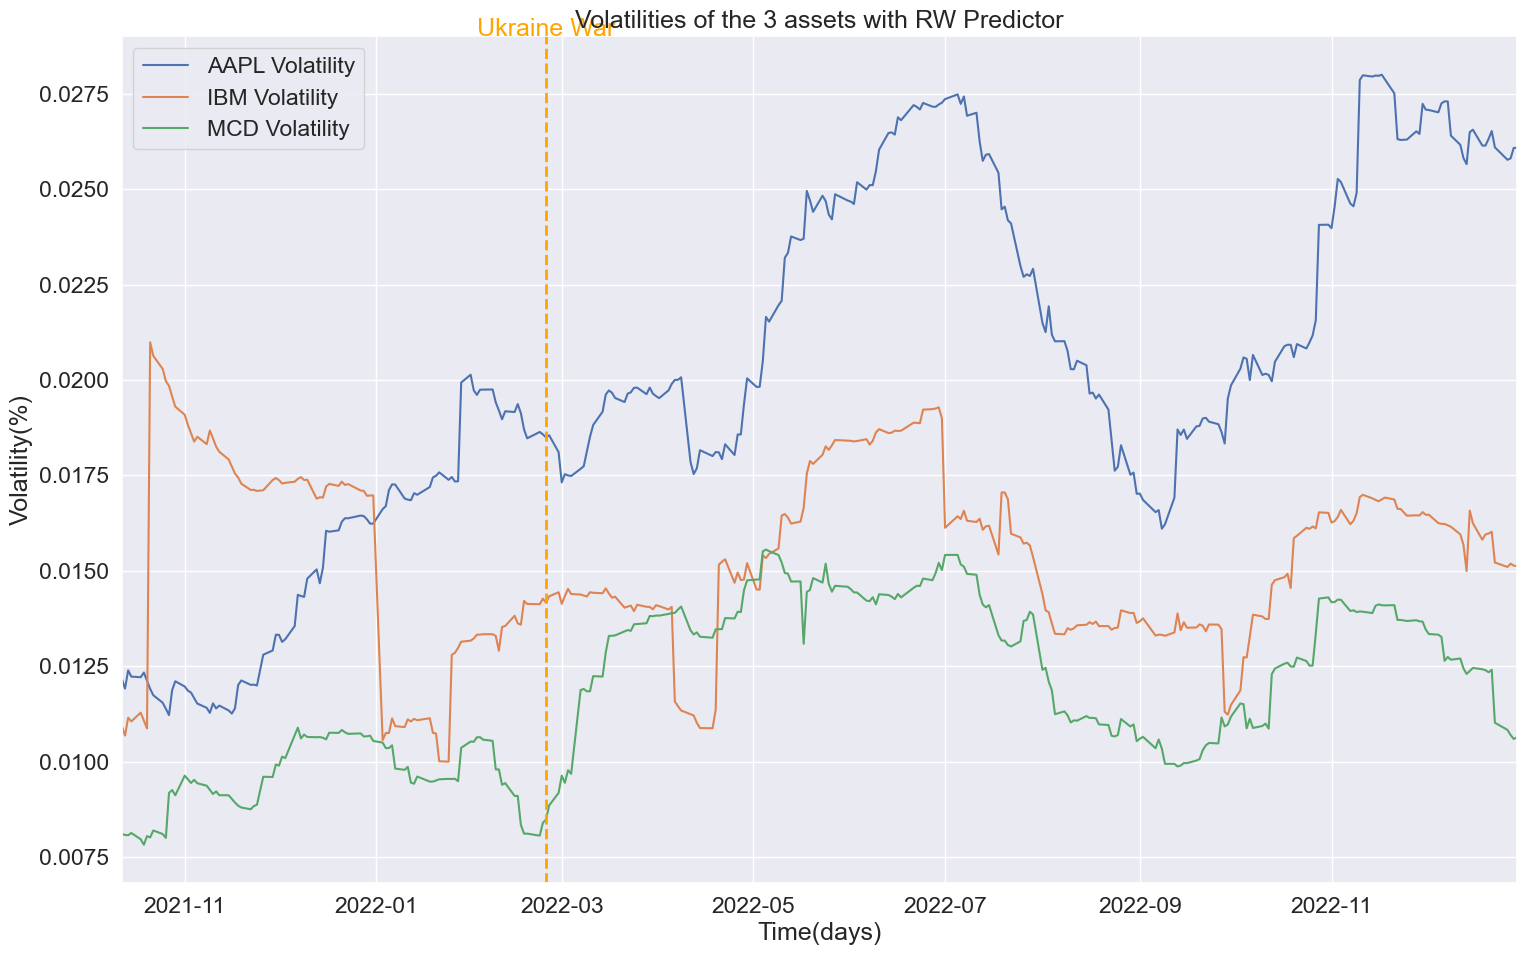

In [11]:
# prepare the date for the test phase

startingTestDate = testDataWithPercentageChange.index[0].strftime("%Y-%m-%d")
endingTestDate = testDataWithPercentageChange.index[-1].strftime("%Y-%m-%d")

# select the best memory size for the RW predictor(the one found in the validation phase)

# here i take the correct configuration( basing on the number of stock in my portfolio)
rw_memory = predictorsConfiguration["RW_memorySize"]
print("rw_memory: " + str(rw_memory))

rwDict = rolling_window(testDataWithPercentageChange, rw_memory)

print("the timestamp of the first element of the rolling window dictionary: " + str(list(rwDict.keys())[0]))
print("the first element of the rolling window dictionary: " + str(rwDict[list(rwDict.keys())[0]]))
    
# now filter the rw volatilities between the start and end date
real_volatility_startDate = pd.to_datetime(startingTestDate)
real_volatility_endDate = pd.to_datetime(endingTestDate)

df_rw_volatility_aapl, df_rw_volatility_ibm, df_rw_volatility_mcd, rw_volatility_dict_aapl, rw_volatility_dict_ibm, rw_volatility_dict_mcd = plot_volatility(rwDict, real_volatility_startDate, real_volatility_endDate, 'RW')

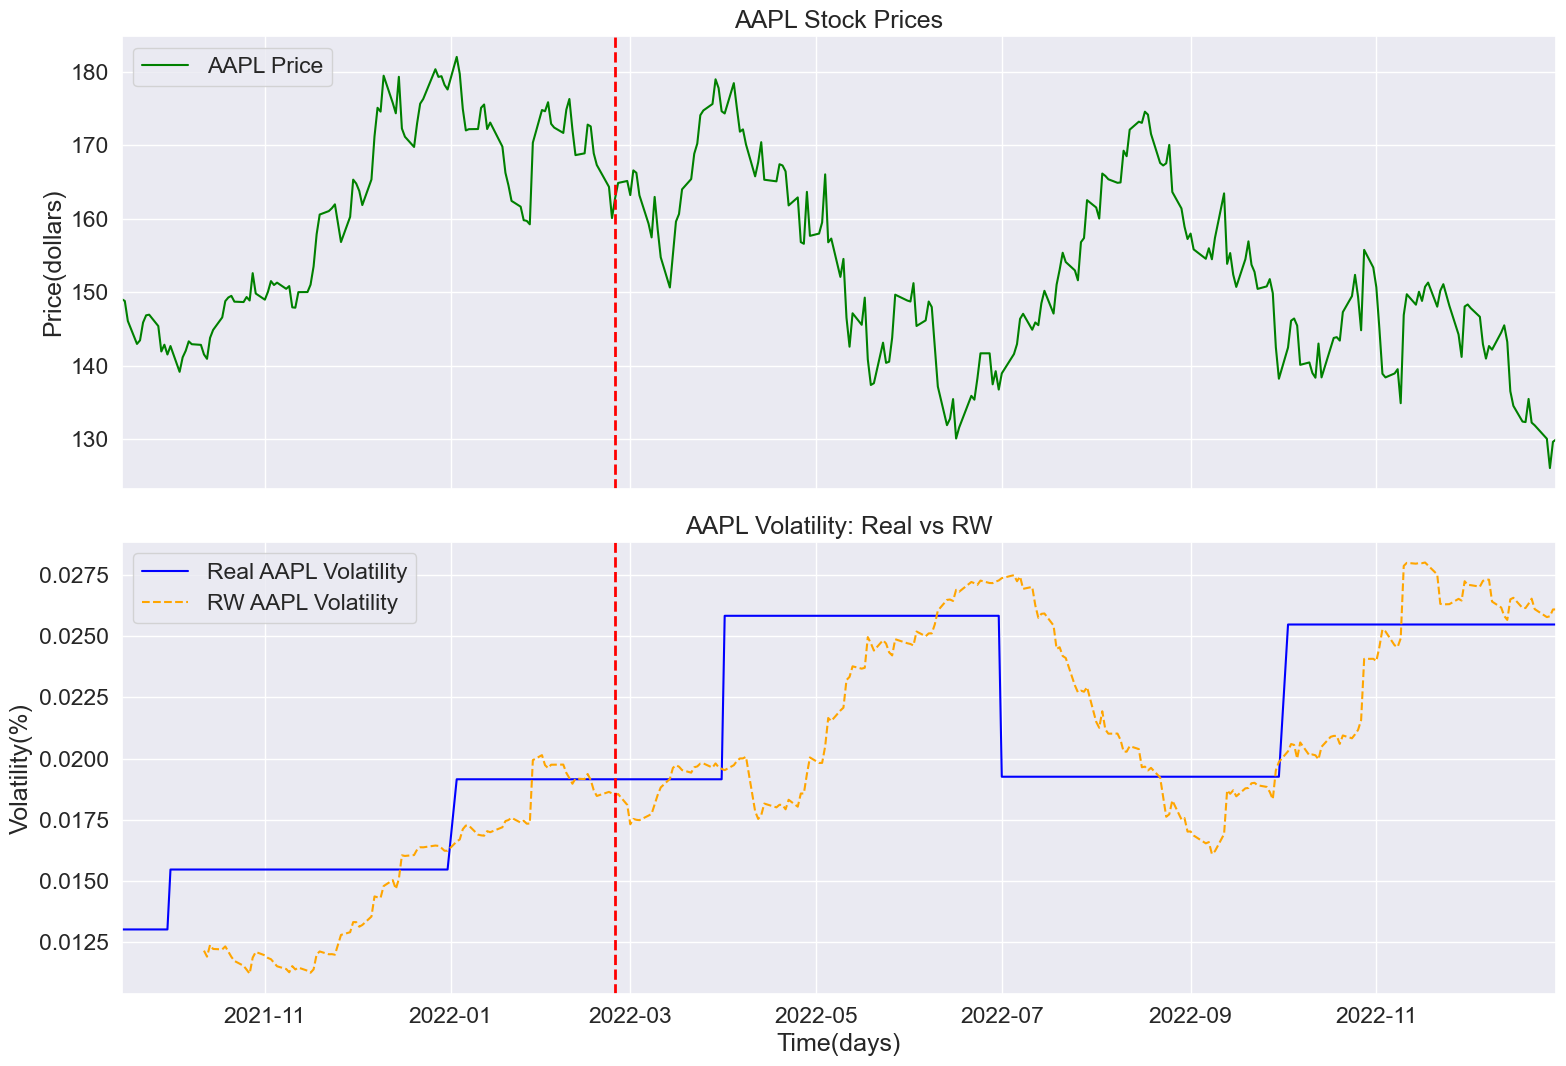

In [12]:
# HERE THERE IS THE VOLATILITY ANALYSIS OF THE EWMA PREDICTOR COMPARED TO THE REAL VOLATILITY
startDateFilter = testDataWithPrices.index[0]
endDateFilter = testDataWithPrices.index[-1]

plot_prices_volatilities_for_predictor(testDataWithPrices, df_volatility_aapl['AAPL Volatility'],startDateFilter, endDateFilter, df_rw_volatility_aapl['AAPL Volatility'], 'AAPL', "RW")

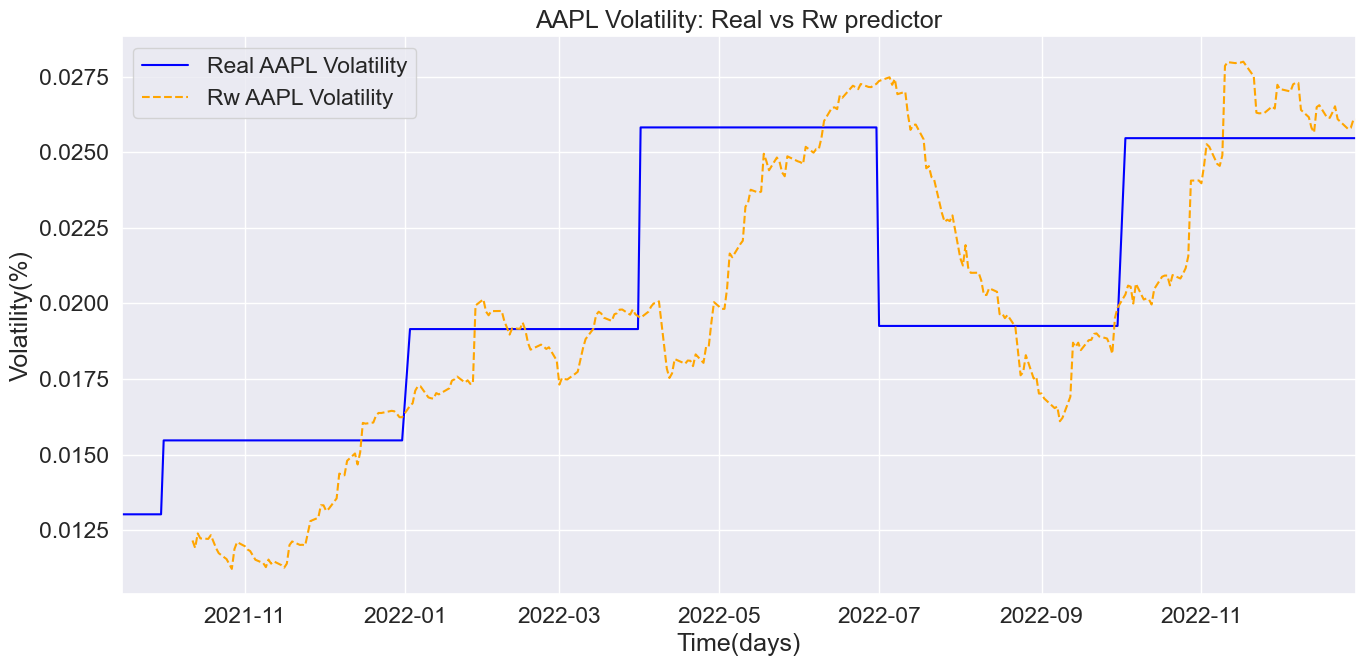

In [13]:
####################### code for test ####################################

def plot_prices_volatilities_for_ewAndRWTest(real_volatility, real_volatility_startDate, real_volatility_endDate, hybrid_volatility, asset_name):
    # filter the real volatility between the start and end date
    real_volatility_startDate = pd.to_datetime(real_volatility_startDate)
    real_volatility_endDate = pd.to_datetime(real_volatility_endDate)

    # Correct way to filter using & operator and parentheses
    real_volatility_filtered = real_volatility[(real_volatility.index >= real_volatility_startDate) & (real_volatility.index <= real_volatility_endDate)]

    plt.figure(figsize=(14, 7))

    # Plot real and rolling window volatilities
    plt.plot(real_volatility_filtered, label='Real AAPL Volatility', color='blue')
    plt.plot(hybrid_volatility, label='Rw AAPL Volatility', color='orange', linestyle='--')
    plt.title('AAPL Volatility: Real vs Rw predictor')
    plt.xlabel('Time(days)')
    plt.ylabel('Volatility(%)')
    plt.legend(loc='upper left')


    # Set x-axis limits to match the start and end dates
    plt.xlim(left=real_volatility_startDate, right=real_volatility_endDate)
    plt.xlim(left=real_volatility_startDate, right=real_volatility_endDate)

    # Set x-axis limits to match the start and end dates
    plt.xlim(left=real_volatility_startDate, right=real_volatility_endDate)
    plt.xlim(left=real_volatility_startDate, right=real_volatility_endDate)

    # Show the plot
    plt.tight_layout()
    plt.show()


# HERE THERE IS THE VOLATILITY ANALYSIS OF THE EWMA PREDICTOR COMPARED TO THE REAL VOLATILITY
startDateFilter = testDataWithPrices.index[0]
endDateFilter = testDataWithPrices.index[-1]

plot_prices_volatilities_for_ewAndRWTest(df_volatility_aapl['AAPL Volatility'],startDateFilter, endDateFilter, df_rw_volatility_aapl['AAPL Volatility'], 'AAPL')
##########################################################################

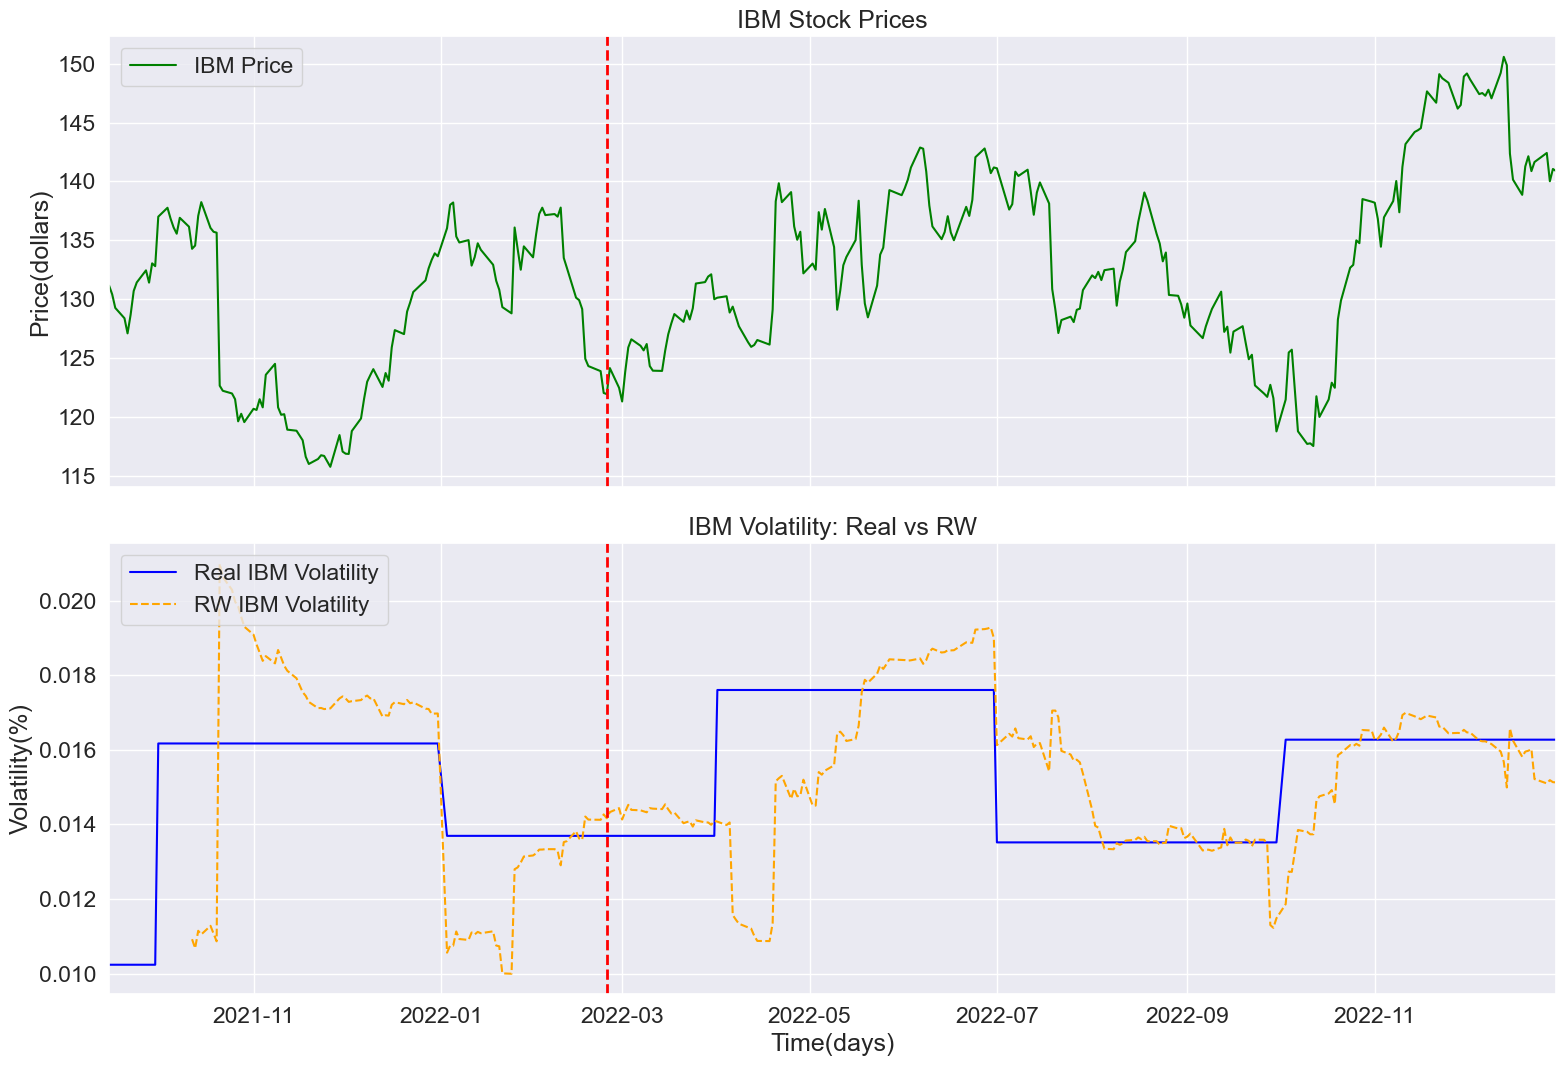

In [14]:
plot_prices_volatilities_for_predictor(testDataWithPrices, df_volatility_ibm['IBM Volatility'], startDateFilter, endDateFilter, df_rw_volatility_ibm['IBM Volatility'], 'IBM', "RW")

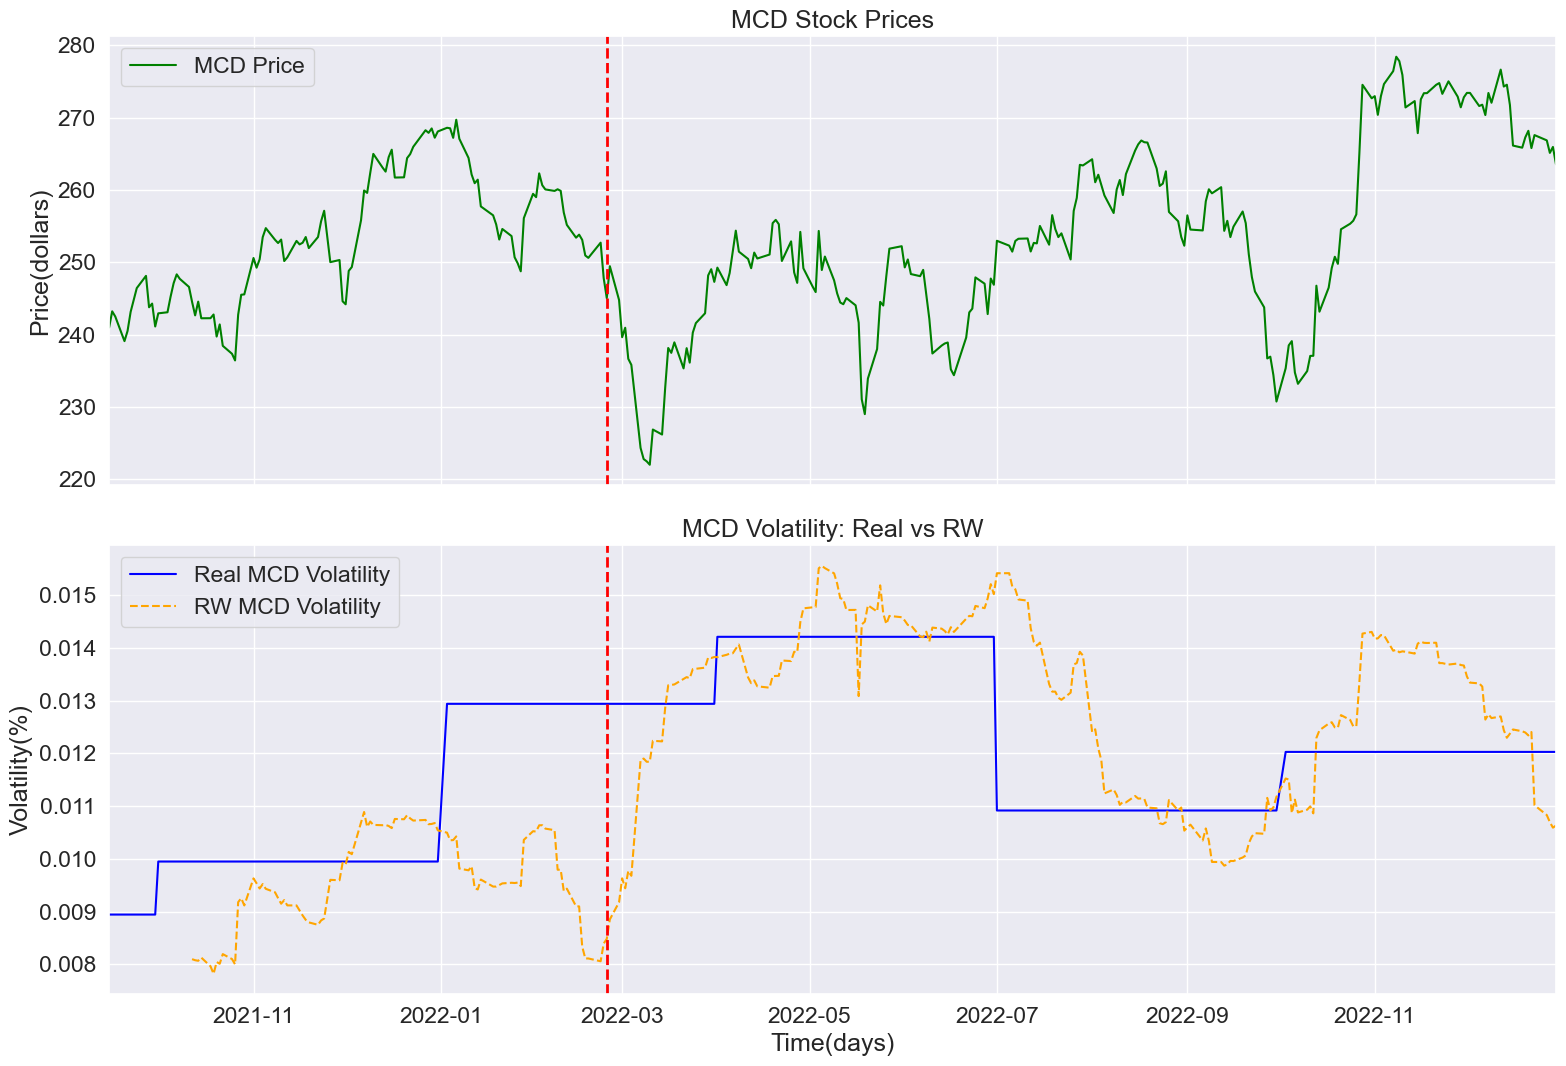

In [15]:
plot_prices_volatilities_for_predictor(testDataWithPrices, df_volatility_mcd['MCD Volatility'], startDateFilter, endDateFilter, df_rw_volatility_mcd['MCD Volatility'], 'MCD', "RW")

size of the first predictor: 308
size of the second predictor: 308
first timestamp of the first predictor: 2021-10-12 00:00:00
first timestamp of the second predictor: 2021-10-12 00:00:00
dets shape:  (307, 1, 1)
matrixProduct shape:  (307, 1, 1)
results saved in detsAndMatrixProduct.csv
product matrix quarterly dataframe:              MatrixProduct
Date                     
2021-12-31       2.623508
2022-03-31       2.034028
2022-06-30       2.042476
2022-09-30       1.471560
2022-12-31       1.956086
constant term quarterly dataframe:              FirstConstantTerm
Date                         
2021-12-31          -2.756816
2022-03-31          -2.756816
2022-06-30          -2.756816
2022-09-30          -2.756816
2022-12-31          -2.756816
log determinants quarterly dataframe:              LogDeterminants
Date                       
2021-12-31       -13.199952
2022-03-31       -13.053303
2022-06-30       -12.564442
2022-09-30       -12.854225
2022-12-31       -12.763161
dets shape:

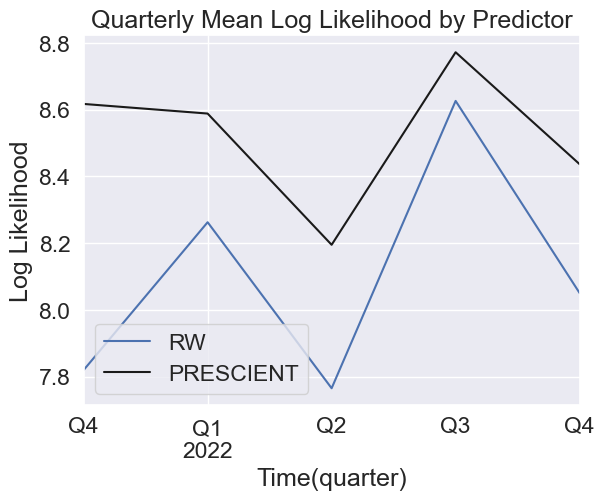



meanRegret: 0.400
stdRegret: 0.200
maxRegret: 0.800
logLikelihood length:  5
logLikelihood shape:  (5,)


meanLoglikelihoodRW: 8.100
stdLoglikelihoodRW: 0.300
maxLoglikelihoodRW: 8.600
logLikelihood length:  5
logLikelihood shape:  (5,)


meanLoglikelihoodPRESCIENT: 8.500
stdLoglikelihoodPRESCIENT: 0.200
maxLoglikelihoodPRESCIENT: 8.800
lenght of prescientDict:  308
lenght of rwDict:  308
lenght of predictorDict:  308

RW RMSE
mean: 0.0135287164
std: 0.0020628591
max: 0.0163685192
lenght of rmses:  5
values of rmses:  {Timestamp('2022-01-02 00:00:00'): 0.01074709212566627, Timestamp('2022-03-31 00:00:00'): 0.011859823873973241, Timestamp('2022-06-30 00:00:00'): 0.01636851922918637, Timestamp('2022-10-02 00:00:00'): 0.015168525875862524, Timestamp('2022-12-29 00:00:00'): 0.013499620975223255}


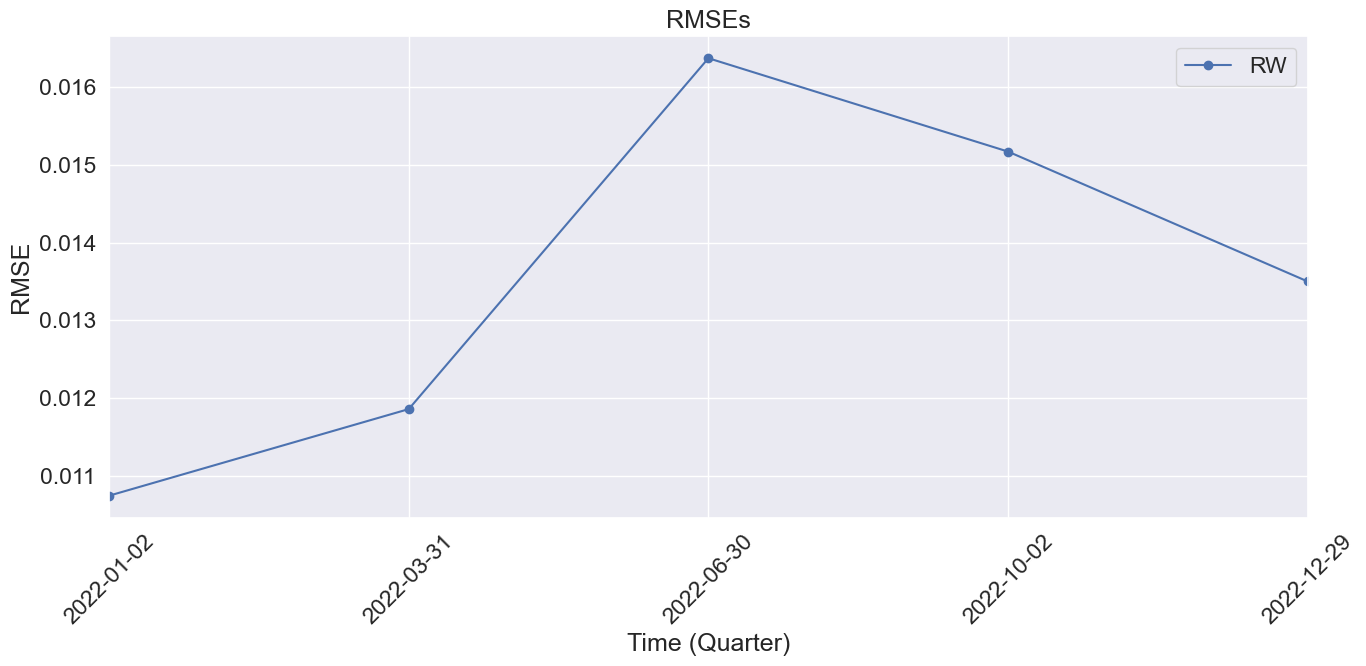

lenght of volatility_dict_aapl:  308
lenght of volatility_dict_aaapl_rw:  308
lenght of RMSEs_aapl:  5
values of RMSEs_aapl:  {Timestamp('2022-01-02 00:00:00'): 0.0525358902430702, Timestamp('2022-03-31 00:00:00'): 0.03566623268687952, Timestamp('2022-06-30 00:00:00'): 0.06685885856365044, Timestamp('2022-10-02 00:00:00'): 0.060761334442955506, Timestamp('2022-12-29 00:00:00'): 0.05408019821948032}


RMSEs for AAPL
mean: 0.0539805028
std: 0.0104818038
max: 0.0668588586


RMSEs for IBM
mean: 0.0437351620
std: 0.0070629588
max: 0.0542960549


RMSEs for MCD
mean: 0.0382106989
std: 0.0098810876
max: 0.0537141126


In [16]:
# NOW I DO THE LAST THING; THE COMPARISON BETWEEN THE RW PREDICTOR AND THE PRESCIENT PREDICTOR IN TERMS OF 
# LOGLIKELIHOOD, LOGLIKELIHOOD REGRET AND MSE

# first of all define the starting and ending date for the test phase: take the first and the last date of the test dataset

startingTestDate = testDataWithPercentageChange.index[0].strftime("%Y-%m-%d")
endingTestDate = testDataWithPercentageChange.index[-1].strftime("%Y-%m-%d")

start_date = pd.to_datetime(startingTestDate, format="%Y-%m-%d")
end_date = pd.to_datetime(endingTestDate, format="%Y-%m-%d")

names = ["RW", "PRESCIENT"]

#these predictors are all dictionaries where each entry contains a Pandas DataFrame representing a covariance matrix of returns at each timestamp.  
predictors_temp = [rwDict, prescientDict]
predictors = [] # so this is a list of dictionaries

for predictor in predictors_temp:
    predictors.append({t: predictor[t] for t in predictor.keys() if t >= start_date and t <= end_date})

# now remove the first 19 entries from the predictor 1(prescient dict)
prescientDict = predictors[1]

# now remove the first 19 entries from the prescient dict
prescientDict = {k: prescientDict[k] for k in list(prescientDict)[19:]}
predictors[1] = prescientDict

print("size of the first predictor: " + str(len(predictors[0])))
print("size of the second predictor: " + str(len(predictors[1])))


# make an assert to check if the length of the two predictors is the same
assert len(predictors[0]) == len(predictors[1])

# make an assert to check if the timestamps of the two predictors are the same
assert predictors[0].keys() == predictors[1].keys()

# print the first timestamp of the two predictors
print("first timestamp of the first predictor: " + str(list(predictors[0].keys())[0]))
print("first timestamp of the second predictor: " + str(list(predictors[1].keys())[0]))

# if we are here, it means that the two predictors have the same length and the same timestamps so i can measure the performance of the two predictors

#
# LOG-LIKELIHOODS
#

'''
    this dictionary has a shape like this:
    {
        RW: pd.Series(log_likelihood(returns_temp, Sigmas_temp), index=times),
        EWMA: pd.Series(log_likelihood(returns_temp, Sigmas_temp), index=times),
        rw: pd.Series(log_likelihood(returns_temp, Sigmas_temp), index=times),
        PRESCIENT: pd.Series(log_likelihood(returns_temp, Sigmas_temp), index=times),
    }

    where each pd.series is a series of log-likelihoods for each timestamp: so there is the log-likelihood value for each timestamp

    daily_log_likelihoods = {}
    for i, predictorDict in enumerate(predictors):

    # if the predictor is the prescient predictor, i have to use the uniformly distributed dataset
    if names[i] == "PRESCIENT":
        returns_temp = uniformlyDistributedReturns.loc[pd.Series(predictorDict).index].values[1:]
    
    else:
        returns_temp = testDataWithPercentageChange.loc[pd.Series(predictorDict).index].values[1:]

    times = pd.Series(predictorDict).index[1:]
    Sigmas_temp = np.stack([predictorDict[t].values for t in predictorDict.keys()])[:-1]       
    daily_log_likelihoods[names[i]] = pd.Series(log_likelihood(returns_temp, Sigmas_temp), index=times)
'''

daily_log_likelihoods = {}
matrix_products_dfs_daily = {}
matrix_products_quarter_dfs = {}
first_constant_term_dfs = {}
log_determinants_dfs = {}

for i, predictorDict in enumerate(predictors):
    if names[i] == "PRESCIENT":
        returns_temp = uniformlyDistributedReturns.loc[pd.Series(predictorDict).index].values[1:]
    else:
        returns_temp = testDataWithPercentageChange.loc[pd.Series(predictorDict).index].values[1:]

    times = pd.Series(predictorDict).index[1:]
    Sigmas_temp = np.stack([predictorDict[t].values for t in predictorDict.keys()])[:-1]
    
    log_likelihood_value, matrix_product_df, first_constant_term_df, log_determinants_df = log_likelihood_for_test(returns_temp, Sigmas_temp, times)
    daily_log_likelihoods[names[i]] = pd.Series(log_likelihood_value, index=times)
    matrix_products_dfs_daily[names[i]] = matrix_product_df
    first_constant_term_dfs[names[i]] = first_constant_term_df
    log_determinants_dfs[names[i]] = log_determinants_df


    # ensure 'Date' is a datetime object and set it as the index
    matrix_products_dfs_daily[names[i]]['Date'] = pd.to_datetime(matrix_products_dfs_daily[names[i]]['Date'])
    matrix_products_dfs_daily[names[i]].set_index('Date', inplace=True)

    # group the matrix products by quarter
    matrix_products_quarter_dfs[names[i]] = matrix_products_dfs_daily[names[i]].resample("Q").mean()

    # ensure 'Date' is a datetime object and set it as the index
    first_constant_term_dfs[names[i]]['Date'] = pd.to_datetime(first_constant_term_dfs[names[i]]['Date'])
    first_constant_term_dfs[names[i]].set_index('Date', inplace=True)

    # group the matrix products by quarter
    first_constant_term_dfs[names[i]] = first_constant_term_dfs[names[i]].resample("Q").mean()

    # ensure 'Date' is a datetime object and set it as the index
    log_determinants_dfs[names[i]]['Date'] = pd.to_datetime(log_determinants_dfs[names[i]]['Date'])
    log_determinants_dfs[names[i]].set_index('Date', inplace=True)

    # group the matrix products by quarter
    log_determinants_dfs[names[i]] = log_determinants_dfs[names[i]].resample("Q").mean()

    # print the dfs
    print("product matrix quarterly dataframe: ", matrix_products_quarter_dfs[names[i]])

    print("constant term quarterly dataframe: ", first_constant_term_dfs[names[i]])

    print("log determinants quarterly dataframe: ", log_determinants_dfs[names[i]])




# Iterate through each predictor in the log_likelihoods dictionary
for name in daily_log_likelihoods.keys():
    if name == 'PRESCIENT':
        # Resample by quarter, take the mean, and plot with specific color and label
        daily_log_likelihoods[name].resample("Q").mean().plot(label=name, c="k")
    else:
        # Resample by quarter, take the mean, and plot with default settings
        daily_log_likelihoods[name].resample("Q").mean().plot(label=name)

plt.xlabel('Time(quarter)')  # Set the x-axis label
plt.ylabel('Log Likelihood')  # Set the y-axis label
plt.title('Quarterly Mean Log Likelihood by Predictor')  # Set the title of the plot
plt.legend()  # Show the legend to identify each predictor
plt.show()  # Display the plot

'''
    this dictionary has a shape like this:
    {
        RW: pd.Series(...),
        EWMA: pd.Series(...),
        rw: pd.Series(...),
        PRESCIENT: pd.Series(...),
    }

    where each pd.series is a series of regret for each timestamp: so there is the 
    regret value (the difference between the log-likelihood of the prescient model and the log-likelihood of the model) for each timestamp
'''
daily_regrets = {}
for name in daily_log_likelihoods:
    daily_regrets[name] =  daily_log_likelihoods["PRESCIENT"] - daily_log_likelihoods[name]


for name in daily_regrets:
    if name != "PRESCIENT":

        #Each data point in the regret series now represents the average regret for a respective quarter. If the original series spans multiple years, then the number of data points in regret will be the number of quarters in that time frame.
        quarterRegret = daily_regrets[name].resample("Q").mean() #it resamples the regret Series to a quarterly frequency, This gives the average regret for each quarter rather than daily regret values  
        # so the regret variable is a series of average regret for each quarter
        
        regretMetrics = (np.mean(quarterRegret).round(1), np.std(quarterRegret).round(1), np.max(quarterRegret).round(1))
        # the round(1) function to each of these metrics, which rounds the result to one decimal place,

        print("\n")
        print(f"meanRegret: {regretMetrics[0]:.3f}")
        print(f"stdRegret: {regretMetrics[1]:.3f}")
        print(f"maxRegret: {regretMetrics[2]:.3f}")


'''
plot regret values

fig, ax = plt.subplots(1, 1, figsize=(10, 5))
for name in names:
    if name == 'PRESCIENT':
        pass
    else:
        regrets[name].resample("Q").mean().plot(label=name)
plt.legend(bbox_to_anchor=(1, 1.1), loc='center right', ncols=4, labels=names[:-1], scatterpoints=1, markerscale=5);
plt.xlabel('Time(quarter)')  # Set the x-axis label
plt.ylabel('Regret')  # Set the y-axis label
plt.title("Regret")
'''

# copy the log-likelihoods dictionary
daily_log_likelihoods_copy = daily_log_likelihoods.copy()

# do the same thing for log-likelihoods dictionary
for name in daily_log_likelihoods_copy:
    logLikelihood = daily_log_likelihoods_copy[name].resample("Q").mean()

    print("logLikelihood length: ", len(logLikelihood))
    print("logLikelihood shape: ", logLikelihood.shape)
    logLikelihoodMetrics = (np.mean(logLikelihood).round(1), np.std(logLikelihood).round(1), np.max(logLikelihood).round(1))

    print("\n")
    print(f"meanLoglikelihood{name}: {logLikelihoodMetrics[0]:.3f}")
    print(f"stdLoglikelihood{name}: {logLikelihoodMetrics[1]:.3f}")
    print(f"maxLoglikelihood{name}: {logLikelihoodMetrics[2]:.3f}")

#
# RMSEs
#

print("lenght of prescientDict: ", len(prescientDict))
print("lenght of rwDict: ", len(rwDict))
        
for i, predictorDict in enumerate(predictors):
    if names[i] != "PRESCIENT":
        print("lenght of predictorDict: ", len(predictorDict))
        RMSEs = RMSE(testDataWithPercentageChange, predictorDict, prescientDict, start_date)
        print("\n" + names[i] + " RMSE")

        # Calculate mean, standard deviation, and max value of the RMSEs
        mean_rmse = np.mean(list(RMSEs.values()))
        std_rmse = np.std(list(RMSEs.values()))
        max_rmse = np.max(list(RMSEs.values()))

        print(f"mean: {mean_rmse:.10f}")
        print(f"std: {std_rmse:.10f}")
        print(f"max: {max_rmse:.10f}")


print("lenght of rmses: ", len(RMSEs))
print("values of rmses: ", RMSEs)

# Convert Timestamps to strings for plotting
timestamps = [ts.strftime('%Y-%m-%d') for ts in RMSEs.keys()]
rmse_values = list(RMSEs.values())

# Plot the RMSEs with improved formatting
plt.figure(figsize=(14, 7))  # Increase the figure size for better readability
plt.plot(timestamps, rmse_values, marker='o', linestyle='-', label='RW', color='b')

# Set the x-axis to only include the dates from the dictionary
plt.xticks(timestamps, rotation=45)

# Remove the left margin
plt.margins(x=0)

# Add labels and title
plt.xlabel('Time (Quarter)')
plt.ylabel('RMSE')
plt.title('RMSEs')
plt.legend()

# Adjust the layout
plt.tight_layout()

# Show the plot
plt.show()

#
# RMSEs for single assets
#
        
# take the first timestamp contained in prescientDict and use it as the start date
startDAte = list(prescientDict.keys())[0]

# filter every volatility dictionary to get only the values that are greater than or equal to the start date
volatility_dict_aapl_filtered = {k: v for k, v in volatility_dict_aapl.items() if k >= startDAte}
volatility_dict_ibm_filtered = {k: v for k, v in volatility_dict_ibm.items() if k >= startDAte}
volatility_dict_mcd_filtered = {k: v for k, v in volatility_dict_mcd.items() if k >= startDAte}

volatility_dict_aapl_rw_filtered = {k: v for k, v in rw_volatility_dict_aapl.items() if k >= startDAte}
volatility_dict_ibm_rw_filtered = {k: v for k, v in rw_volatility_dict_ibm.items() if k >= startDAte}
volatility_dict_mcd_rw_filtered = {k: v for k, v in rw_volatility_dict_mcd.items() if k >= startDAte}


print("lenght of volatility_dict_aapl: ", len(volatility_dict_aapl_filtered))
print("lenght of volatility_dict_aaapl_rw: ", len(volatility_dict_aapl_rw_filtered))
# get the rmse of single assets. i take just aapl, ibm and mcd
        
RMSEs_aapl_dict = RMSEforSingleVolatility(testDataWithPercentageChange, volatility_dict_aapl_filtered, volatility_dict_aapl_rw_filtered, start_date)
RMSEs_ibm_dict = RMSEforSingleVolatility(testDataWithPercentageChange, volatility_dict_ibm_filtered, volatility_dict_ibm_rw_filtered, start_date)
RMSEs_mcd_dict = RMSEforSingleVolatility(testDataWithPercentageChange, volatility_dict_mcd_filtered, volatility_dict_mcd_rw_filtered, start_date)

print("lenght of RMSEs_aapl: ", len(RMSEs_aapl_dict))
print("values of RMSEs_aapl: ", RMSEs_aapl_dict)

print("\n")
print("RMSEs for AAPL")

# Calculate mean, standard deviation, and max value of the RMSEs. the RMSEs are dictionaries whose key is the timestamp and the value is the rmse value
mean_rmse_aapl = np.mean(list(RMSEs_aapl_dict.values()))
std_rmse_aapl = np.std(list(RMSEs_aapl_dict.values()))
max_rmse_aapl = np.max(list(RMSEs_aapl_dict.values()))

print(f"mean: {mean_rmse_aapl:.10f}")
print(f"std: {std_rmse_aapl:.10f}")
print(f"max: {max_rmse_aapl:.10f}")

print("\n")
print("RMSEs for IBM")

# Calculate mean, standard deviation, and max value of the RMSEs. the RMSEs are dictionaries whose key is the timestamp and the value is the rmse value
mean_rmse_ibm = np.mean(list(RMSEs_ibm_dict.values()))
std_rmse_ibm = np.std(list(RMSEs_ibm_dict.values()))
max_rmse_ibm = np.max(list(RMSEs_ibm_dict.values()))

print(f"mean: {mean_rmse_ibm:.10f}")
print(f"std: {std_rmse_ibm:.10f}")
print(f"max: {max_rmse_ibm:.10f}")

print("\n")
print("RMSEs for MCD")

# Calculate mean, standard deviation, and max value of the RMSEs. the RMSEs are dictionaries whose key is the timestamp and the value is the rmse value
mean_rmse_mcd = np.mean(list(RMSEs_mcd_dict.values()))
std_rmse_mcd = np.std(list(RMSEs_mcd_dict.values()))
max_rmse_mcd = np.max(list(RMSEs_mcd_dict.values()))

print(f"mean: {mean_rmse_mcd:.10f}")
print(f"std: {std_rmse_mcd:.10f}")
print(f"max: {max_rmse_mcd:.10f}")

Now here i store all the variables that i need to pass to other notebooks.

In [17]:
# create a dictionary for the volatilities of the prescient predictor
real_volatilities = {}

# add the volatilities of the 3 assets to the dictionary
real_volatilities['AAPL'] = volatility_dict_aapl_filtered
real_volatilities['IBM'] = volatility_dict_ibm_filtered
real_volatilities['MCD'] = volatility_dict_mcd_filtered

# create a dictionary for the volatilities of the rw predictor
rw_volatilities = {}

# add the volatilities of the 3 assets to the dictionary
rw_volatilities['AAPL'] = volatility_dict_aapl_rw_filtered
rw_volatilities['IBM'] = volatility_dict_ibm_rw_filtered
rw_volatilities['MCD'] = volatility_dict_mcd_rw_filtered

# store the 2 dictionaries
%store real_volatilities
%store rw_volatilities

Stored 'real_volatilities' (dict)
Stored 'rw_volatilities' (dict)
